In [1]:
#同时输出一个cell多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all' 
import numpy as np
import pandas as pd
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt

## 读入数据

In [2]:
iris=pd.read_csv('d:/iris.csv')  #读入iris数据集，150个样本的5个特征 sepallength（花萼长度）petallength（花瓣长度），三个类别
#根据特征分为两部分，分别为预测特征target 和数据特征集 data
iris_data=iris.iloc[:,:4]
iris_target=iris['Species']
iris_target.index

RangeIndex(start=0, stop=150, step=1)

## 数据预处理---最大最小值规范化

In [3]:
from sklearn.preprocessing import MinMaxScaler
iris_data=MinMaxScaler().fit_transform(iris_data)# 数值型0-1规范化
X =iris_data
y=iris_target


## KNN分类

<p><font size="3" color="red"> KNeighborsClassifier（）参数：<br/>
 &nbsp;&nbsp;- n_neighbors=k <br/>
 &nbsp;&nbsp;- 距离默认为欧式距离，当指定metric= 'minkowski'时，可加参数p=1为曼哈顿距离， p=2为欧式距离。</p>

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn,X,y, cv=5)#5折交叉验证
scores.mean()#平均准确率


0.9533333333333334

## KNN 寻找合适的k值

Text(0.5, 0, 'Value of K for KNN')

Text(0, 0.5, 'Error')

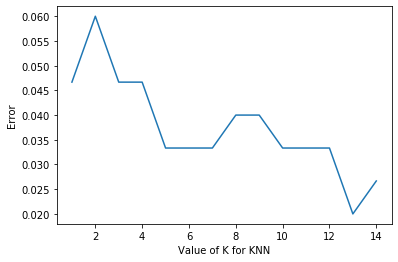

In [5]:
k_range = range(1, 15)# k从1到15，寻找最优值
k_error=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)#默认欧式距离，当指定metric= 'minkowski'时，可加参数p=1为曼哈顿距离， p=2为欧式距离。
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy') #6折交叉验证
    k_error.append(1 - scores.mean())
#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

## 决策树分类

<p><font size="3" color="red">  DecisionTreeClassifier()参数：<br/>
 &nbsp;&nbsp;  
criterion默认gini，可选entropy；<br/>
 &nbsp;&nbsp; max_depth:决策树最大深度<br/>
 &nbsp;&nbsp; min_samples_split:子树继续划分的条件，如果某节点的样本数少于此值，不会划分，默认2<br/>
 &nbsp;&nbsp; min_samples_leaf:叶节点最小样本数，如果子数据集中的样本数小于这个值，那么该叶节点和其兄弟节点都会被剪枝，默认为1。</p>

In [6]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier(criterion='gini')  #定义分类器
scores=cross_val_score(dtc, iris_data, iris_target, cv=10)#10折交叉验证
scores.mean()  #平均准确率
dtc.fit(iris_data, iris_target).feature_importances_  #特征重要性

0.9533333333333334

array([0.02666667, 0.        , 0.55072262, 0.42261071])

# 支持向量机SVM

<p><font size="3" color="red">  SVC()支持向量机分类模型,参数：<br/>
 &nbsp;&nbsp; kernel：核函数类型，默认为’rbf’，linear：线性核函数，poly：多项式核函数，sigmod：sigmod核函数<br/>
 &nbsp;&nbsp; degree :默认为3,只对'kernel=poly'(多项式核函数)有用<br/>
&nbsp;&nbsp; gamma：核函数系数， 只对‘rbf’,‘poly’,‘sigmod’有效，默认1/n_features</p>
 


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=iris_target)#留出法划分数据集
from sklearn.svm import SVC
#3个不同核函数
svc1=SVC(kernel="rbf")
svc1.fit(X_train, y_train)
score_rbf=svc1.score(X_test,y_test)
score_rbf

svc2=SVC(kernel="poly",degree=2,gamma=3)
svc2.fit(X_train, y_train)
score_poly=svc2.score(X_test,y_test)
score_poly

svc3=SVC(kernel="linear")
svc3.fit(X_train, y_train)
score_linear=svc3.score(X_test,y_test)
score_linear

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9555555555555556

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=3, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9555555555555556

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9555555555555556

# 随机森林

<p><font size="3" color="red">  RandomForestClassifier()随机森林模型,参数：<br/>
 &nbsp;&nbsp; n_estimators：核函数类型，默认为100，最多树的个数<br/>
 &nbsp;&nbsp; max_depth :决策树最大深度，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。<br/>
     &nbsp;&nbsp; min_samples_leaf :叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝，默认1。<br/>
&nbsp;&nbsp; min_samples_split：子树继续划分的条件，如果某节点的样本数少于此值，不会划分，默认2<br/>
&nbsp;&nbsp;  max_leaf_nodes：最大叶子节点数，通过限制最大叶子节点数，可以防止过拟合，默认是”None”<br/>
&nbsp;&nbsp;criterion：默认gini，可选entropy；</p>

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)  #定义分类器
clf.fit(X_train, y_train)      #训练
scores=clf.score(X_test,y_test)    #准确率
scores
print(clf.feature_importances_)  #特征重要性


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.9333333333333333

[0.08246747 0.02128802 0.45114378 0.44510073]
